# Computer Assigment 2


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)

# Steganography via least norm

<a id='Usefull_Info'></a>

## Usefull Info
In this exercise we explore a simple approach to steganography that relies on constrained least squares.

* The secret message is given by a k-vector s $\in \{-1,1\}$
* The original image is given by the n-vector x, where n is usually much larger than k.
* We send (or publish or transmit) the modifed message x + z, where z is an n-vector of modifcations. We would like z to be
small, so that the original image x and the modifed one x+z look (almost) the same
* We would like z to be small, so that the original image x and the modifed one x+z look (almost) the same. Our accomplice decodes the message s by multiplying the modifed image by a k x n matrix D, which yields the k-vector y = D(x + z). The message is then decoded as ^s = sign(y). (We write ^s to show that it is an estimate, and might not be the same as the original.) The matrix D must have linearly independent rows, but otherwise is arbitrary.

sectret (k): s
original (n): x
modifiations (n): z 
modified: x+z  (n)-> z small
multiply (k) * (x+z) (n) -> y=D(x+z)
decoded message: sign(y)

## (a) *Encoding via least norm.* 

Let $\alpha$ be a positive constant. We choose z to minimize $ \Vert z \Vert^2$ subject to $D(x+z) = \alpha s$. (This guarantees that the decoded message is correct, i.e., $\hat{s} = s$. ) Give a formula for z in terms of $D^{\dagger}$, $\alpha$, and $x$. 

### Solution:

Following the **Least norm problem** from the vmls book (Chapter 16) we have:

$D(x + z) = as \Rightarrow Dx + Dz = as \Rightarrow  Dz = as - Dx$ which can be written as $ \hat{z} = D^{\dagger} (as - Dx)$

We can think of this problem as the same one contained in the book where $C = D$ and $d = as - Dx$. Using the **Solution of Least norm problem** we have:


$$\begin{bmatrix}
2I & D^T \\
D & 0
\end{bmatrix} 
\begin{bmatrix}
\hat{z} \\
\hat{\lambda}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
as - Dx
\end{bmatrix}
$$

From where we can derive:
$ \hat{z} = \dfrac{1}{2} D^T \hat{\lambda}$ which we can substitute to the constrain and get $-\dfrac{1}{2} D D^T  \hat{\lambda} = as - Dx$. 

Since D is invertible we can write $ \hat{\lambda} = -2 (D D^T)^{-1} (as - Dx) $ from where:

$ \hat{z} = D^T (D D^T)^{-1} (as - Dx) = D^{\dagger} (as - Dx)$

## (b) *Complexity*. 

### i. 
**Question:** What is the complexity of encoding a secret message in an image? (You can assume that $D^{\dagger}$ is already computed and saved.) 


**Answer** 

A multiplication of two matrices of sizes ($n$ x $p$) x ($p$ x $m$) costs $n$ x $m$ x (2$p$ - 1) [*source*](https://www.stat.cmu.edu/~ryantibs/convexopt-F18/scribes/Lecture_19.pdf).

To encode the secter message we make the following calculations:
* $Dx$: ($k$ x $n$) ($n$ x 1) $\approx$ $2kn$ flops
* $as$: $k$ flops
* $as-Dx$: $k$ flops
* $D^{\dagger}(as-Dx)$: ($n$ x $k$) ($k$ x 1) $\approx$ $2kn$ flops

Given that $n$ is much larger than $k$ we can assume that the total cost of encoding the secret message is approximately $4kn$ =  flops.

### ii. 

**Question:** What is the complexity of decoding the secret message?

**Answer** 

To decode the secret message we make the following calculations:
* $x + z$: $n$ flops
* $D (x + z)$ : 2$kn$ flops

In total $2kn$ + $n$.

### 
**Question:**
iii. About how long would each of these take with a computer capable of 1 Gflop/s, for k = 128 and n = 512<sup>2</sup> = 262144 (a 512 x 512 image)?

**Answer** 

For the encoding we need approximately 1.34 x $10^8$ flops ($4kn$) which is equivalent to 134ms, while for the decoding we need approximately 6.74 x $10^7 flops ($2kn$) which is equivalent to 67ms. 

## (c) Try it out.

Choose an image x, with entries between 0 (black) and 1 (white), and a secret message s with k small compared to n, for example, k = 128 for a
512 x 512 image. (This corresponds to 16 bytes, which can encode 16 characters, i.e., letters, numbers, or punctuation marks.) 

Choose the entries of D randomly, and compute $D^{\dagger}$. 

The modifed image x+z may have entries outside the range [0; 1]. We replace any negative values in the modifed image with zero, and any values greater than one with one. 

Adjust $\alpha$ until the original and modifed images look the same, but the secret message is still decoded correctly. (If $\alpha$ is too small, the clipping of
the modifed image values, or the round-off errors that occur in the computations, can lead to decoding error, i.e., $\hat{s} \ne s$. If $\alpha$ is too large, the modifcation will be
visually apparent.) Once you've chosen $\alpha$, send several different secret messages embedded in several different original images.

### Solution

* We will use the popular image `Lena.jpg` for this task.

In [2]:
def NormalizeData(data):
    """Function that normalizes and return an array."""
    return (data - np.min(data)) / (np.max(data) - np.min(data))

* The image is loaded and the `gray` cmap is used. Moreover the image is saved in the variable `data` which is also a normalized version of it.

(567, 567)


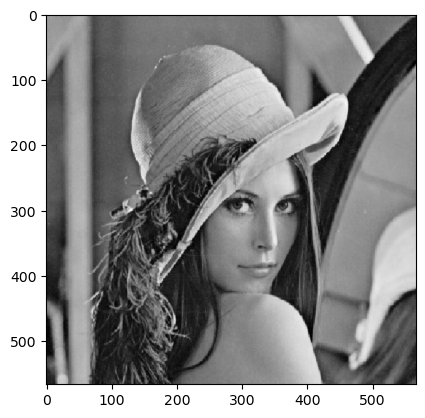

In [3]:
# Load the image
image = Image.open('Lena.jpg')
data =  NormalizeData(np.asarray(image))

plt.imshow(image,  cmap='gray')
print(data.shape)

_ = plt.show()

* We will proceed with defining the various tables presented in the [Usefull Info](#Usefull_Info) section of this notebook.

In [4]:
# define x matrix
x = data.flatten().reshape(-1,1)
n =  x.shape[0]
print("x vector has size n=", n)

x vector has size n= 321489


In [5]:
# define s
np.random.seed(0)
s = np.random.choice([-1,1],size=100).reshape(-1,1)

k = s.shape[0]
print("s vector has size k=", k)

s vector has size k= 100


In [6]:
# define D
np.random.seed(0)
D = np.random.uniform(-1,1,(k,n))

print("D matrix has size k x n=", D.shape)
print("D table has rank:", np.linalg.matrix_rank(D))

D matrix has size k x n= (100, 321489)
D table has rank: 100


* Having defined the various tables we need to define $D^{\dagger}$. Numpy already provides the [`numpy.linalg.pinv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) class, which computes the (Moore-Penrose) pseudo-inverse of a matrix, using its singular-value decomposition (SVD).
* It is worth noting that since k < n the actual definition of the table would be: $D^{\dagger} = D^T (DD^T)^{-1}$.

In [7]:
D_dag = np.linalg.pinv(D)

* We can now re-construct the original image, for various values of $\alpha$ and also see how well we decode the secret message. Looking at the results, we can see that for very small values of $\alpha$ the re-constructed image looks similar to the original one, but the Error Rate of decoding the secret message is high. As $\alpha$ increases the error rate goes to zero, while we lose information of the image, up to the point of have only noise (last image). The optimal threshold would be around 10, where the error rate is zero and the image doesn't contain visible noise.

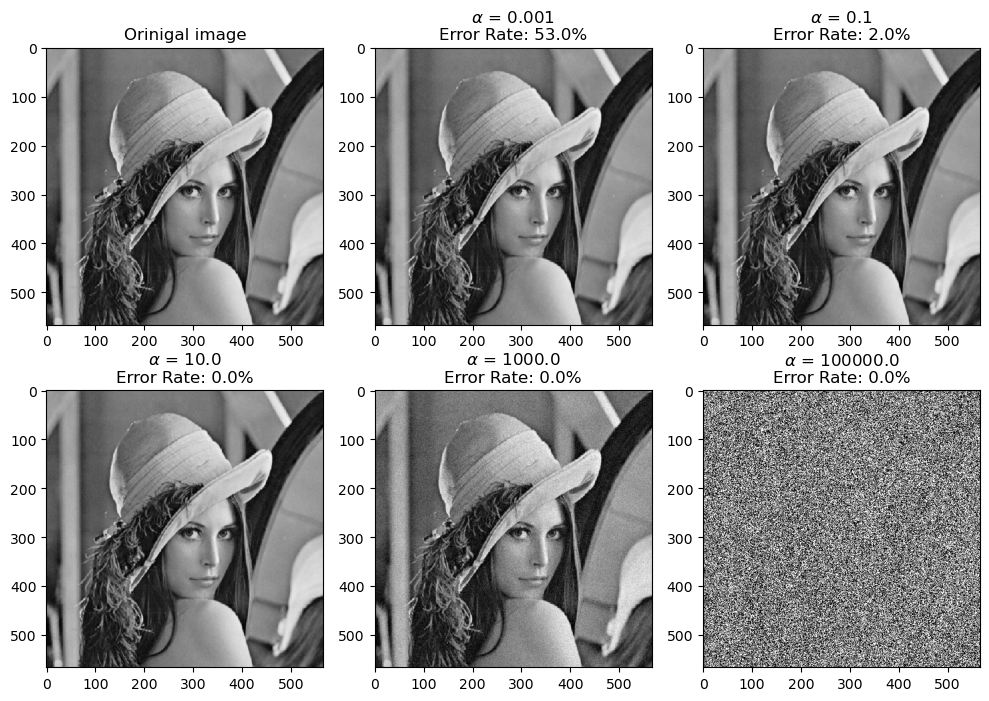

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(10,7))

a = 10.0**(np.arange(-3, 7, 2))

for i, triaxes in enumerate(ax.reshape(-1)):

    if i == 0:
        triaxes.imshow(data,  cmap='gray')
        triaxes.set_title('Orinigal image')
    else:
        # calculate z and x+z
        z = D_dag.dot(a[i-1]*s - D.dot(x))
        x_z = pd.Series((x+z).flatten()).apply(lambda x: 0 if x < 0 else 1 if x>1 else x).to_numpy().reshape(-1,1)
        
        # decode message 
        y = D.dot(x_z)
        s_hat = np.sign(y)

        triaxes.imshow(x_z.reshape((567, 567)),  cmap='gray')
        triaxes.set_title(f"$\\alpha$ = {a[i-1]}\nError Rate: {(s_hat != s).sum()/s_hat.shape[0]*100}%")

fig.tight_layout()
_ = plt.show()